In [ ]:
# !pip uninstall tensorflow tensorflow-tensorboard tensorflow-estimator
!pip install gdown
!pip install tensorflow-gpu

In [259]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import RobustScaler

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

f_transformer = RobustScaler()
p_transformer = RobustScaler()

In [260]:
df = pd.read_csv(
  "/home/jovyan/work/training_data/sw_training_data.csv", 
  parse_dates=['read_date'], 
  index_col="read_date"
)

In [261]:
df = df.drop(['bl_meter1','bl_meter2','bl_meter3','bl_ahd3','mean_temp3','bl_meter4','bl_ahd4','mean_temp4','sl_meter','rf_meter'
             ],axis=1)

In [262]:
df.shape

(5297, 6)

In [263]:
df.head()

,sl_read1,bl_ahd1,mean_temp1,bl_ahd2,mean_temp2,rf_read1
read_date,,,,,,
2005-12-02,0.295,253.271,19.800,251.641,21.400,19.8
2005-12-03,0.303,253.277,19.825,251.644,21.350,21.4
2005-12-04,0.307,253.278,19.800,251.639,21.375,0.0
2005-12-05,0.303,253.275,19.824,251.636,21.375,0.0
2005-12-06,0.304,253.273,19.801,251.638,21.400,0.0


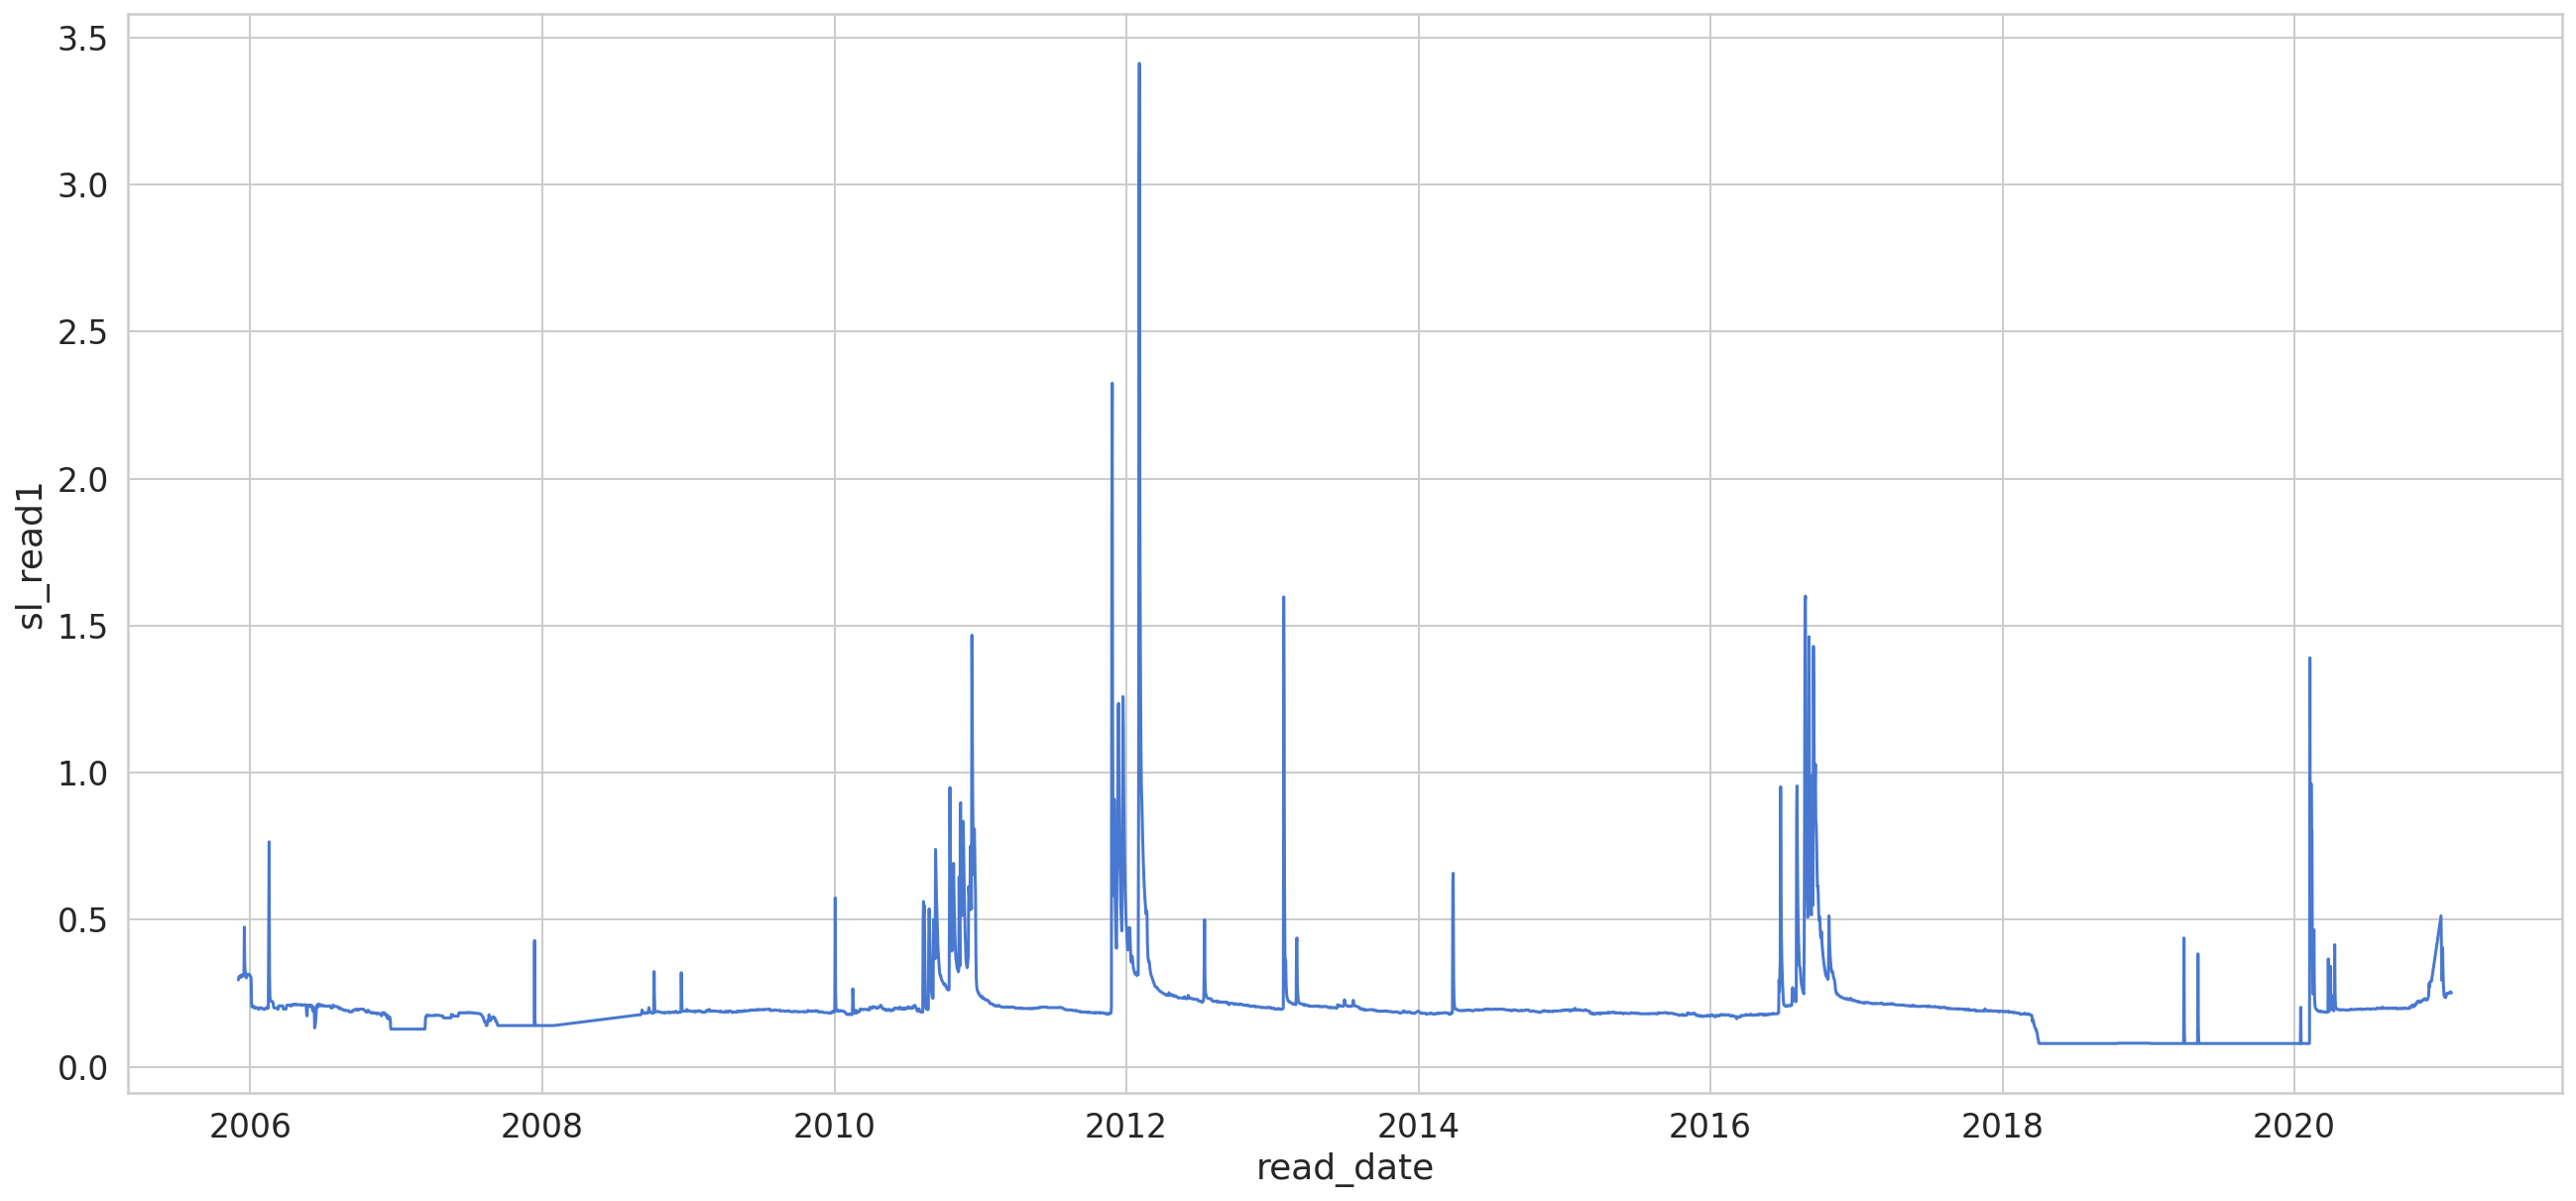

In [264]:
sns.lineplot(x=df.index, y="sl_read1", data=df);

In [230]:
# skip

# def scale_input(X,Y):
# 
#     f_columns = ['bl_ahd1', 'mean_temp1', 'bl_ahd2', 'mean_temp2','rf_read1']
#     p_columns = ['sl_read1','bl_ahd1','bl_ahd2']
#     
#     f_transformer = f_transformer.fit(X[f_columns].to_numpy())
#     p_transformer = p_transformer.fit(Y[p_columns].to_numpy())
#     
#     X.loc[:, f_columns] = f_transformer.transform(X[f_columns].to_numpy())
#     Y.loc[:, p_columns] = p_transformer.transform(Y[p_columns].to_numpy())
#     
#     return X, Y


In [265]:

# read_date sl_read1 	bl_ahd1 	mean_temp1 	bl_ahd2 	mean_temp2 	rf_read1
def create_data():
    
    df1 = df.copy()
    df2 = df.copy()
    df2 = df2.drop(['mean_temp1','mean_temp2','rf_read1'],axis=1)
    
    #df1, df2 = scale_input(df1,df2) 

    return(df1,df2)

In [266]:
def create_train(X,Y):
    train_size = int(len(X) * 0.75)
    X_train, Y_train = X[0:train_size], Y[0:train_size]
#    print(len(X_train), len(Y_train))
    return X_train, Y_train

In [267]:
def create_test(X,Y):
    train_size = int(len(X) * 0.75)
    test_size = len(X) - train_size
    X_test, Y_test = X[train_size:(train_size + test_size)], Y[train_size:(train_size + test_size)]
#    print(len(X_test), len(Y_test))
    return X_test, Y_test

In [268]:
def create_dataset(datax, datay, step):
    X, Y = [], []
    for i in range(len(datax) - step):
        d = i + step  
        X.append(datax[i:d,])
        Y.append(datay[d])
        
    return np.array(X), np.array(Y)

In [269]:
#skip
# def create_dataset0(X, y, time_steps=1):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         v = X.iloc[i:(i + time_steps)].values
#         Xs.append(v)        
#         ys.append(y.iloc[i + time_steps])
#     return np.array(Xs), np.array(ys)

In [270]:
def create_lineplot(X_train, X_test):
    
    print (X_train)
    sns.lineplot(x=X_train.index, y=X_train[0], data=X_train);
    sns.lineplot(x=X_test.index, y=X_test[0], data=X_test);
    
    #sns.lineplot(x=X_train.index, y="sl_read1", data=X_train);
    #sns.lineplot(x=X_test.index, y="sl_read1", data=X_test);

In [271]:
time_steps = 10

Xs,Ys = create_data()

# f_columns = ['bl_ahd1', 'mean_temp1', 'bl_ahd2', 'mean_temp2','rf_read1']
# p_columns = ['sl_read1','bl_ahd1','bl_ahd2']
# 
# f_transformer = f_transformer.fit(Xs[f_columns].to_numpy())
# p_transformer = p_transformer.fit(Ys[p_columns].to_numpy())
# 
# Xs.loc[:, f_columns] = f_transformer.transform(Xs[f_columns].to_numpy())
# Ys.loc[:, p_columns] = p_transformer.transform(Ys[p_columns].to_numpy())
# 

Xs = Xs.to_numpy()
Ys = Ys.to_numpy()

Xs_train, Ys_train = create_train(Xs,Ys) 
Xs_test, Ys_test = create_test(Xs,Ys)

#create_lineplot(pd.DataFrame(Xs_train),pd.DataFrame(Xs_test))

print(Xs_train.shape, Ys_train.shape)
print(Xs_test.shape, Ys_test.shape)

# Xs_train, Ys_train = scale_input(Xs_train,Ys_train,)
# Xs_test, Ys_test = scale_input(Xs_test,Ys_test)
# 
print(Xs_train.shape, Ys_train.shape)
print(Xs_test.shape, Ys_test.shape)

X_train, Y_train = create_dataset(Xs_train,Ys_train, time_steps)
X_test, Y_test = create_dataset(Xs_test,Ys_test, time_steps)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3972, 6) (3972, 3)
(1325, 6) (1325, 3)
(3972, 6) (3972, 3)
(1325, 6) (1325, 3)
(3962, 10, 6) (3962, 3)
(1315, 10, 6) (1315, 3)


In [193]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [48]:
#skip
def create_dataset(X, Y, step):
    
    print(X.shape, Y.shape, step)
    
    Xs, Ys = [], []
    for i in range(len(X)-step):
        d = i+step
        v = X.iloc[i:d].values
        Xs.append(v)
        
        z = Y.iloc[i:d].values
        #X.append(datax[i:d,])
        Ys.append(z)
        #Ys.append(Y[d])
    
    #Xs.dtype()   #i.e. a list
    #Ys.dtype()   #i.e. a list
    
    return np.array(Xs), np.array(Ys)

In [272]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=3))
model.compile(loss='mean_squared_error', optimizer='adam')

In [273]:
history = model.fit(
    X_train, Y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
112/112 [==============================] - 5s 20ms/step - loss: 40813.2655 - val_loss: 37066.2930
Epoch 2/30
112/112 [==============================] - 2s 14ms/step - loss: 35905.6126 - val_loss: 32610.4941
Epoch 3/30
112/112 [==============================] - 2s 15ms/step - loss: 31522.2933 - val_loss: 28462.2578
Epoch 4/30
112/112 [==============================] - 2s 14ms/step - loss: 27478.9831 - val_loss: 24740.0273
Epoch 5/30
112/112 [==============================] - 2s 15ms/step - loss: 23897.7115 - val_loss: 21500.8379
Epoch 6/30
112/112 [==============================] - 2s 15ms/step - loss: 20649.7250 - val_loss: 18462.5469
Epoch 7/30
112/112 [==============================] - 2s 15ms/step - loss: 17749.6019 - val_loss: 15795.8525
Epoch 8/30
112/112 [==============================] - 2s 15ms/step - loss: 15149.8684 - val_loss: 13357.2705
Epoch 9/30
112/112 [==============================] - 2s 15ms/step - loss: 12788.6600 - val_loss: 11258.7246
Epoch 10/30
112/112

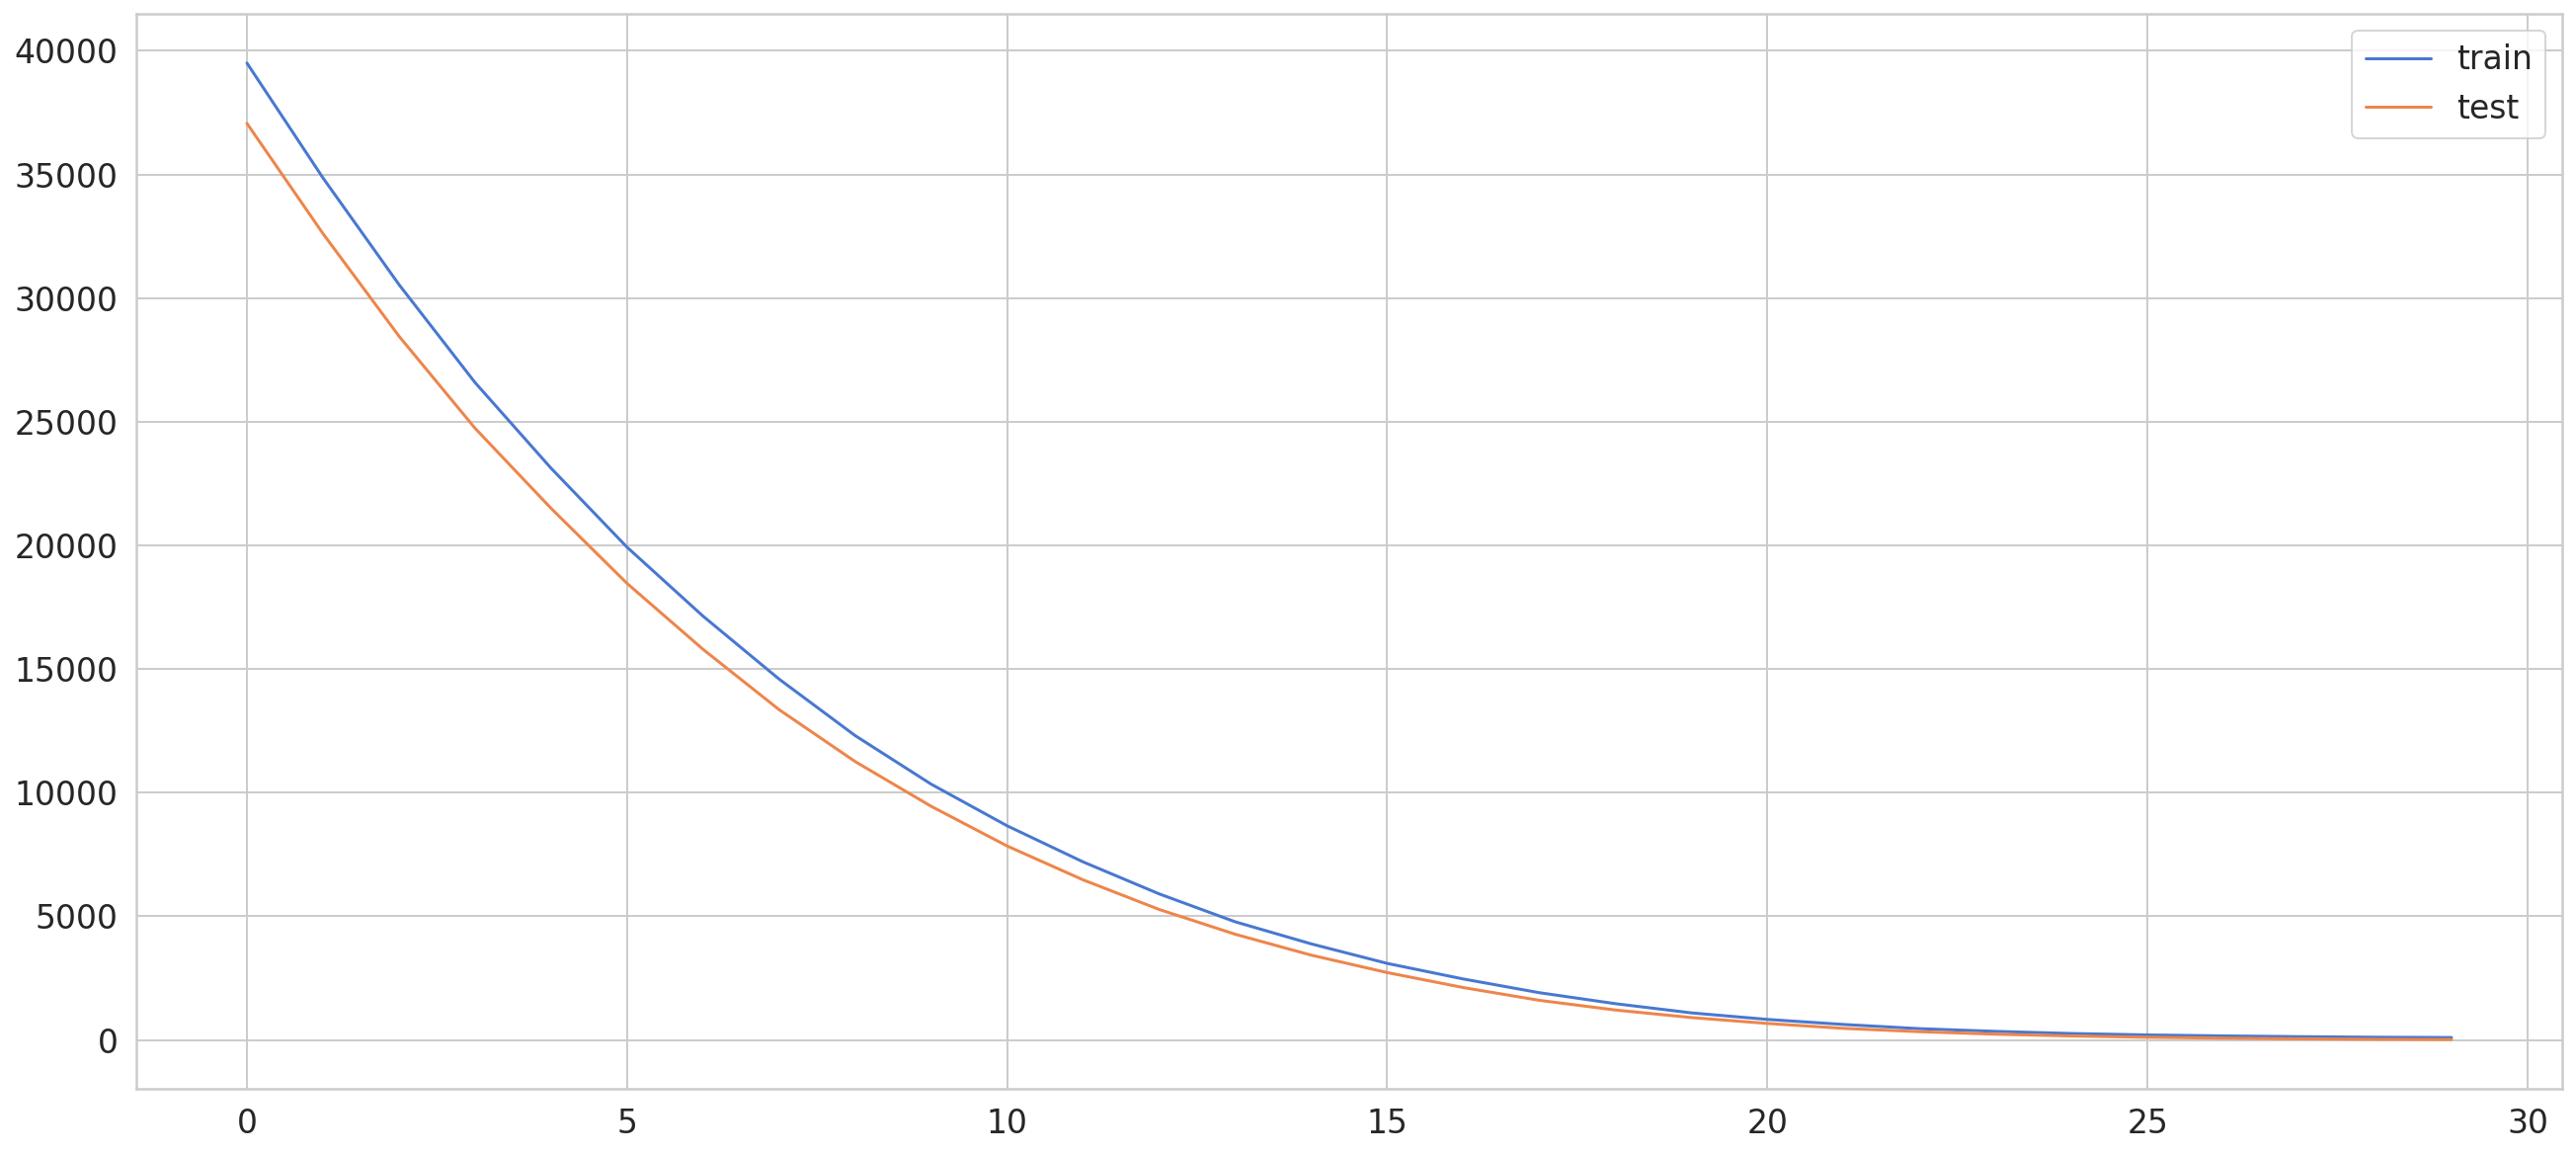

In [274]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [275]:
Y_pred = model.predict(X_test)

In [258]:
#skip

Y_train_inv = p_transformer.inverse_transform(Y_train.reshape(1, -1))
Y_test_inv = p_transformer.inverse_transform(Y_test.reshape(1, -1))
Y_pred_inv = p_transformer.inverse_transform(Y_pred)

ValueError: operands could not be broadcast together with shapes (1,11886) (3,) (1,11886) 

In [220]:
plt.plot(np.arange(0, len(Y_train)), Y_train_inv[:,0].flatten(), 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(y_test)), Y_test_inv[:,0].flatten(), marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(y_test)), Y_pred_inv[:,0].flatten(), 'r', label="prediction")
plt.ylabel('CF419051')
plt.xlabel('Time Step')
plt.legend()
plt.show();

NameError: name 'Y_train_inv' is not defined

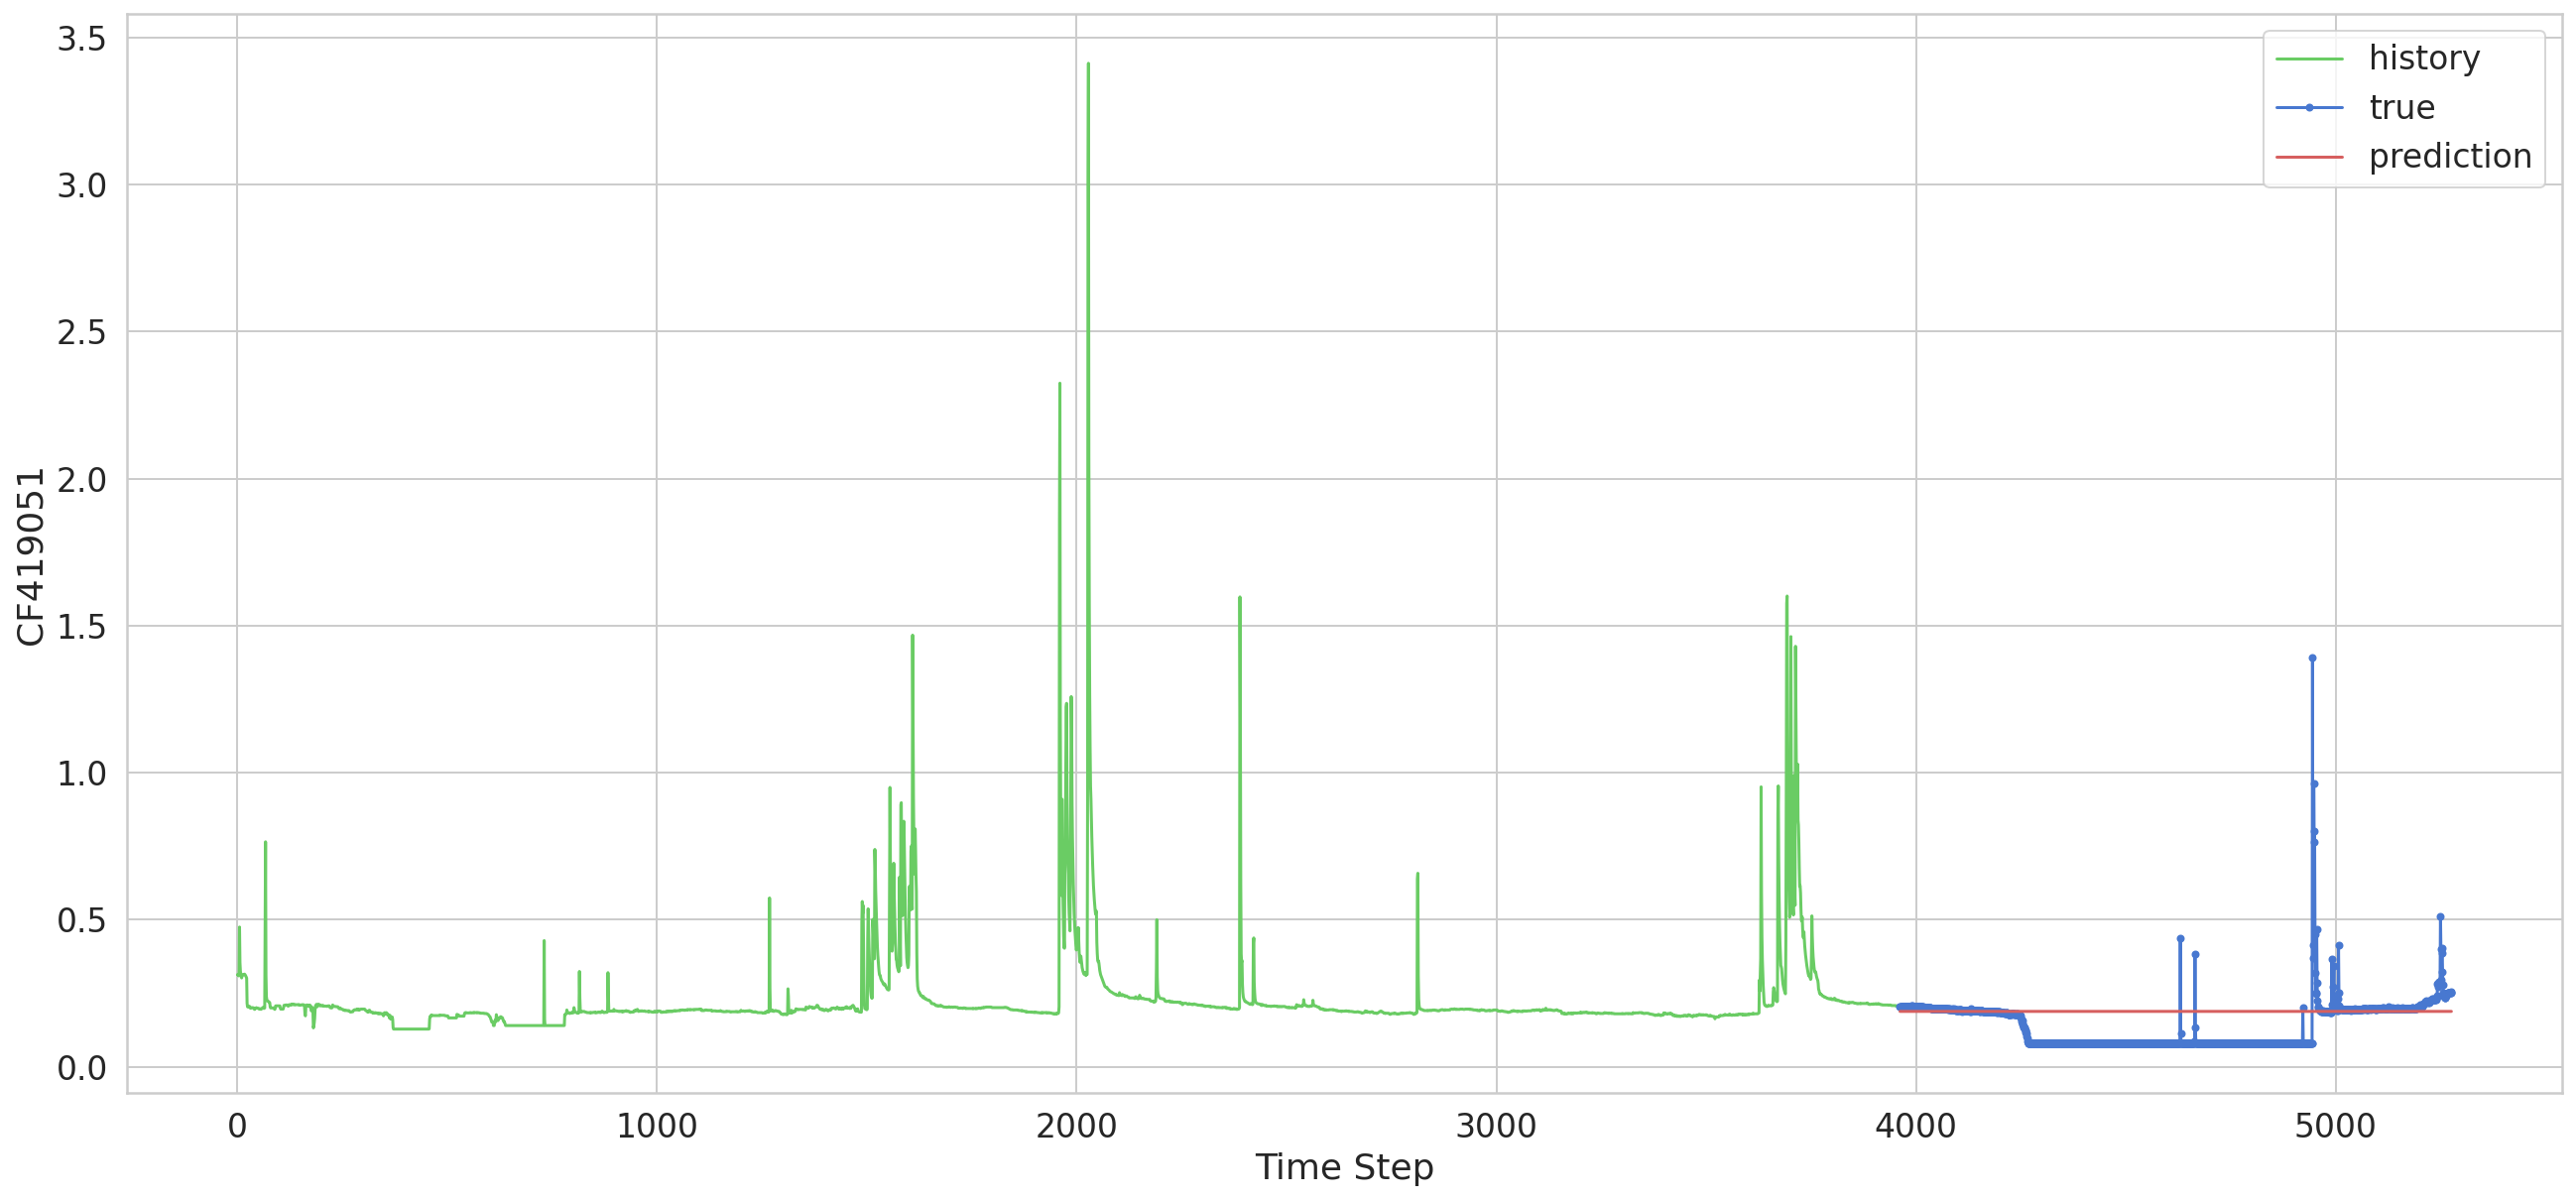

In [276]:
# no invert of scaling

plt.plot(np.arange(0, len(Y_train)), Y_train[:,0], 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:,0], marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred[:,0], 'r', label="prediction")
plt.ylabel('CF419051')
plt.xlabel('Time Step')
plt.legend()
plt.show();

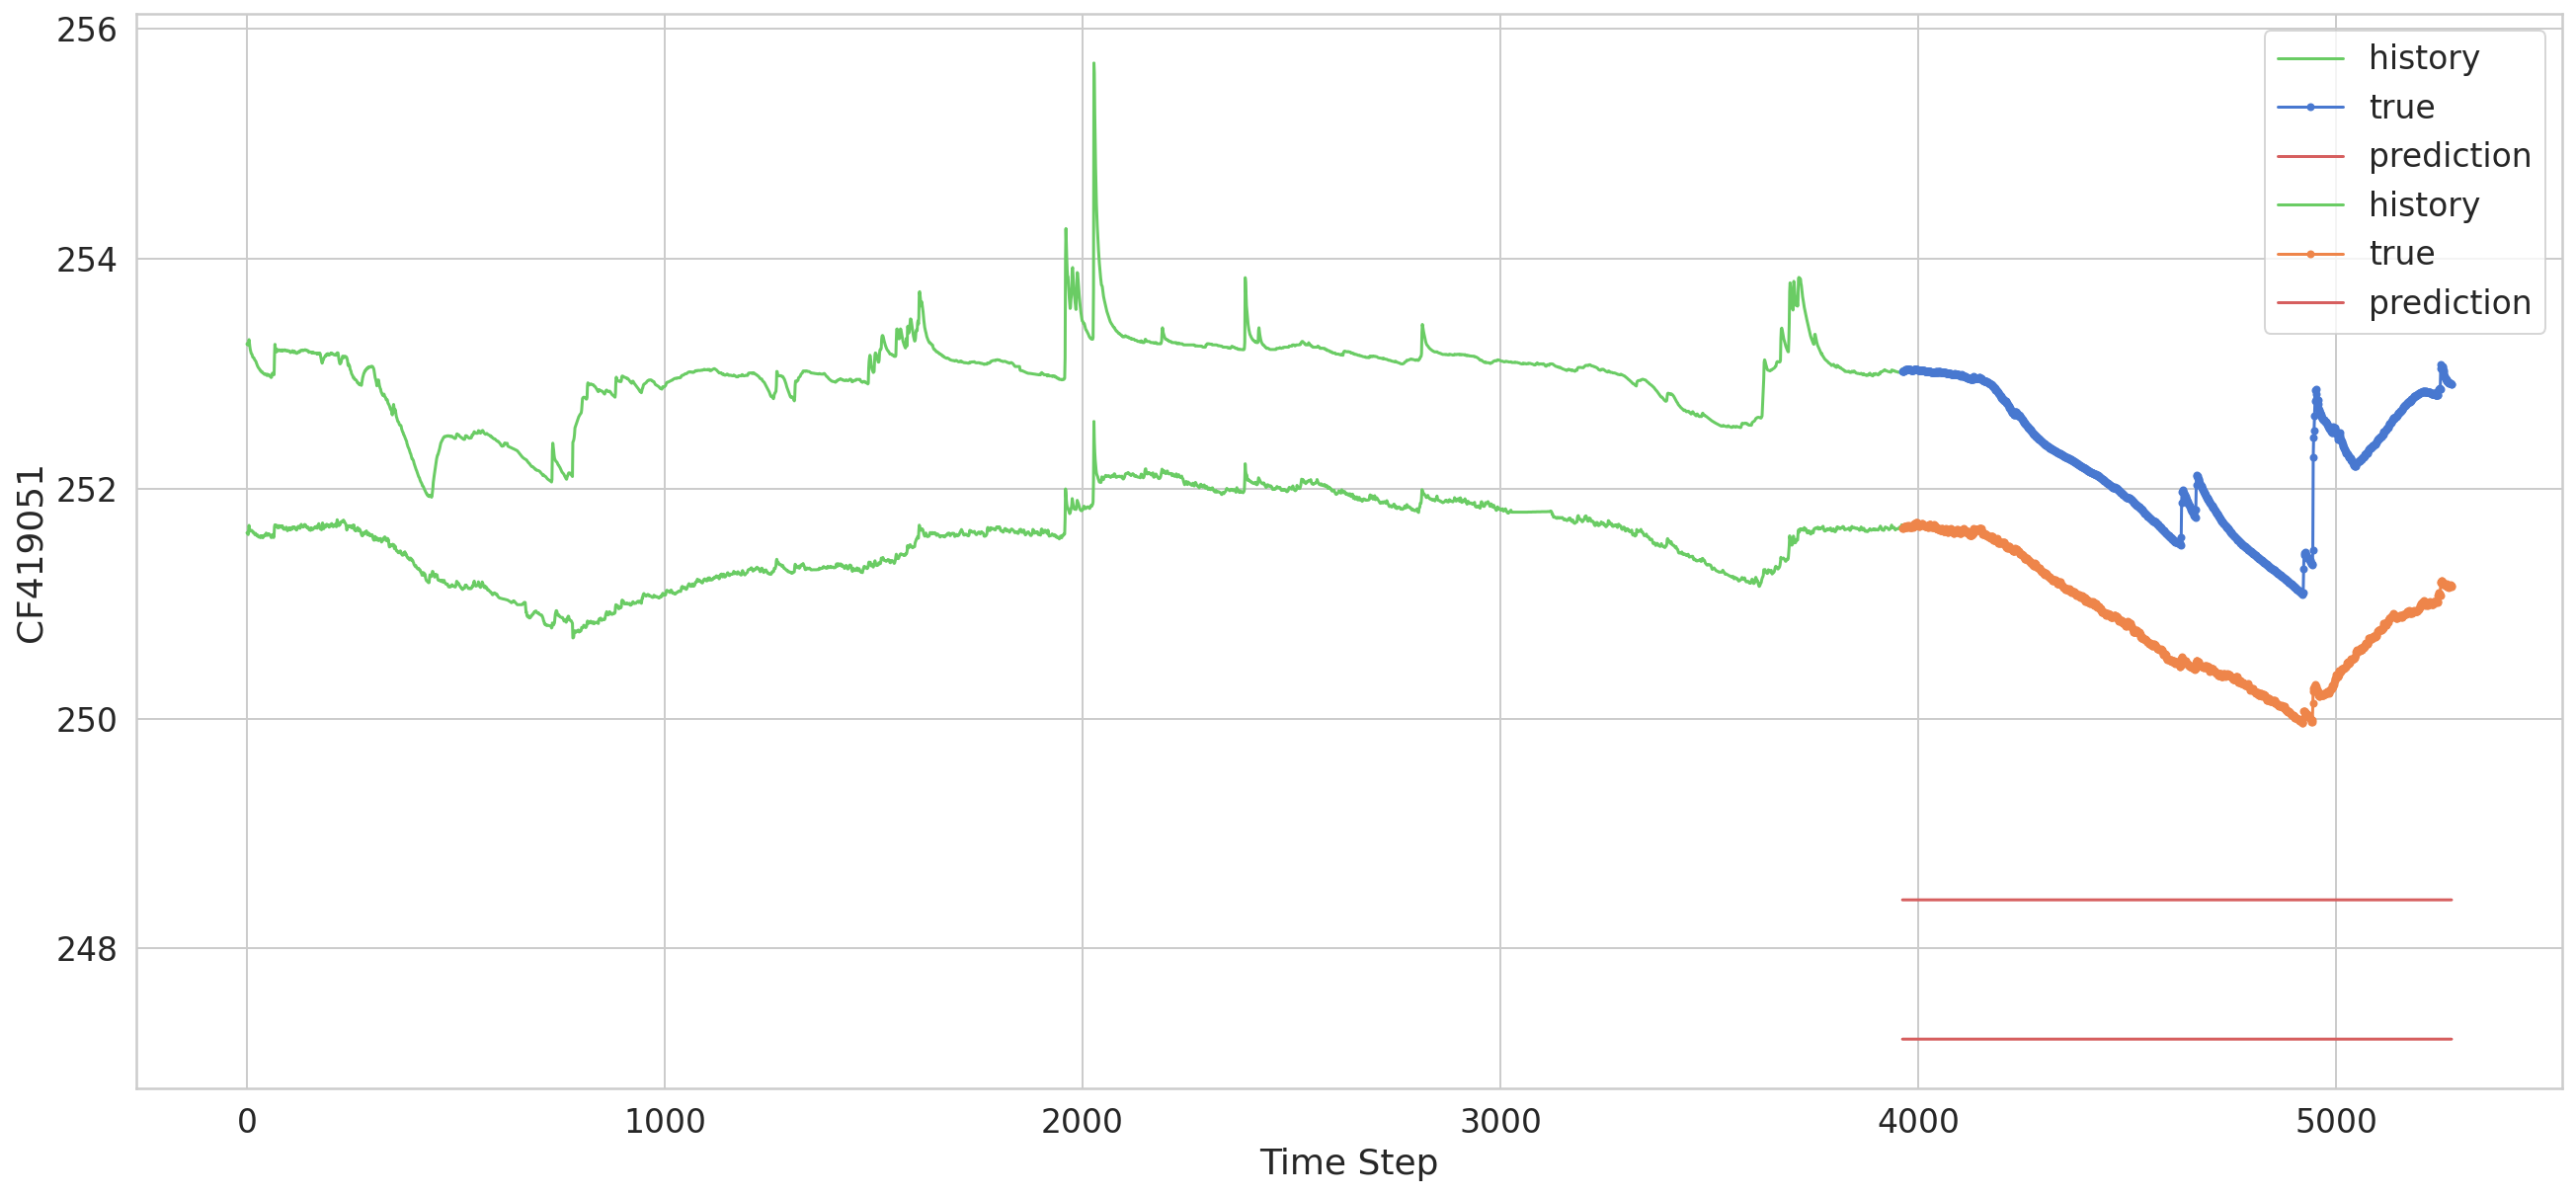

In [277]:
plt.plot(np.arange(0, len(Y_train)), Y_train[:,1], 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:,1], marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred[:,1], 'r', label="prediction")
plt.plot(np.arange(0, len(Y_train)), Y_train[:,2], 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:,2], marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred[:,2], 'r', label="prediction")
plt.ylabel('CF419051')
plt.xlabel('Time Step')
plt.legend()
plt.show();